In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
gender_data = pd.read_csv('data/gender_submission.csv')

In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
train_data_x = train_data[['Pclass', 'Sex', 'Age']]
train_data_y = train_data['Survived']

train_data_x.loc[train_data_x['Sex'] == 'male', 'Sex'] = 1
train_data_x.loc[train_data_x['Sex'] == 'female', 'Sex'] = 0
train_data_x['Sex'] = train_data_x['Sex'].astype('int').copy()

test_data_x = test_data[['Pclass', 'Sex', 'Age']]
test_data_y = gender_data['Survived']

test_data_x.loc[test_data_x['Sex'] == 'male', 'Sex'] = 1
test_data_x.loc[test_data_x['Sex'] == 'female', 'Sex'] = 0
test_data_x['Sex'] = test_data_x['Sex'].astype('int')


/usr/local/Caskroom/miniforge/base/envs/Algorithm/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-22-4f96be8c129f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_x['Sex'] = train_data_x['Sex'].astype('int').copy()
<ipython-input-22-4f96be8c129f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [26]:
train_data_x.info()
print(train_data_x)
print(train_data_y)
print(test_data_x)
print(test_data_y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  202 non-null    int64  
 1   Sex     202 non-null    int64  
 2   Age     202 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.3 KB
     Pclass  Sex   Age
1         1    0  38.0
3         1    0  35.0
6         1    1  54.0
10        3    0   4.0
11        1    0  58.0
..      ...  ...   ...
871       1    0  47.0
872       1    1  33.0
879       1    0  56.0
887       1    0  19.0
889       1    1  26.0

[202 rows x 3 columns]
1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 202, dtype: int64
     Pclass  Sex   Age
0         3    1  34.5
1         3    0  47.0
2         2    1  62.0
3         3    1  27.0
4         3    0  22.0
..      ...  ...   ...
413       3    1   NaN
414       1    0  39.0
415       3  

In [29]:
print(train_data.head())
train_data.describe()

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.00,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,NaN,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,NaN,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.92,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,21.25,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.50,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.75,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.00,3.000000,4.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  202 non-null    int64  
 1   Sex     202 non-null    int64  
 2   Age     202 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.3 KB
     Pclass  Sex   Age
1         1    0  38.0
3         1    0  35.0
6         1    1  54.0
10        3    0   4.0
11        1    0  58.0
..      ...  ...   ...
871       1    0  47.0
872       1    1  33.0
879       1    0  56.0
887       1    0  19.0
889       1    1  26.0

[202 rows x 3 columns]
1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 202, dtype: int64
     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)  

Epoch 44/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3376 - acc: 0.6624 - val_loss: 0.6364 - val_acc: 0.3636
Epoch 45/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3531 - acc: 0.6469 - val_loss: 0.6364 - val_acc: 0.3636
Epoch 46/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3599 - acc: 0.6401 - val_loss: 0.6364 - val_acc: 0.3636
Epoch 47/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2931 - acc: 0.7069 - val_loss: 0.6364 - val_acc: 0.3636
Epoch 48/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4142 - acc: 0.5858 - val_loss: 0.6364 - val_acc: 0.3636
Epoch 49/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3284 - acc: 0.6716 - val_loss: 0.6364 - val_acc: 0.3636
Epoch 50/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3083 - acc: 0.6917 - val_loss: 0.6364 - val_acc: 0.3636
Epoch 51/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3669 - acc: 0.63

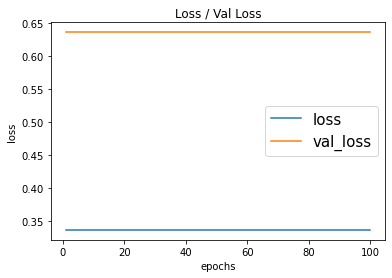

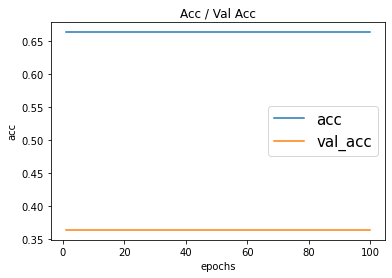

In [18]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_dim=3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# model.com
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mae', metrics=['acc'])
EPOCHS = 100

history = model.fit(train_data_x, train_data_y,
                    validation_data=(test_data_x, test_data_y),
                    epochs=EPOCHS)

# print(history)

plt.plot(np.arange(1, 1+EPOCHS), history.history['loss'])
plt.plot(np.arange(1, 1+EPOCHS), history.history['val_loss'])
plt.title('Loss / Val Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

plt.plot(np.arange(1, 1+EPOCHS), history.history['acc'])
plt.plot(np.arange(1, 1+EPOCHS), history.history['val_acc'])
plt.title('Acc / Val Acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()



